# Income Prediction

#### This notebook will test different methods on the adult income data. The idea is to demonstrate the full cycle of data analytics using python.

#### My intention is to create models using:
1. Logistic Regression
2. Tree
3. Random Forest
4. SVMs
5. Neural Net
6. AdaBoost
7. GBM
8. Ensemble voting method

### Data Import and pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import csv
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [2]:
#The original adult.data file has problems, so we generate csv file to make the input reading solid.
with open("D:\\Documents\\DataSets\\AXAdataset\\dataset\\adult.data") as input_file:
   lines = input_file.readlines()
   newLines = []
   for line in lines:
      newLine = line.strip().split()
      newLines.append( newLine )

with open('D:\\Documents\\DataSets\\AXAdataset\\dataset\\adult.csv', 'wb') as test_file:
   file_writer = csv.writer(test_file)
   file_writer.writerows( newLines )

In [3]:
data = pd.read_csv("D:\\Documents\\DataSets\\AXAdataset\\dataset\\adult.csv", sep=',', header= None)

In [4]:
cols = ['age','workclass','fnlwgt','education','education.num','marital.status','occupation',
                                  'relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country',
                                  'income']
data.columns = cols
data[cols] = data[cols].replace({',': ''}, regex=True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.dtypes

age               object
workclass         object
fnlwgt            object
education         object
education.num     object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain      object
capital.loss      object
hours.per.week    object
native.country    object
income            object
dtype: object

In [150]:
data[['age','fnlwgt']] = data[['age','fnlwgt']].astype(int)

data[['education.num','capital.gain','capital.loss','hours.per.week']] = data[['education.num','capital.gain','capital.loss','hours.per.week']].astype(float)

data.dtypes

age                 int32
workclass          object
fnlwgt              int32
education          object
education.num     float64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country     object
income             object
incomeClass         int32
dtype: object

In [7]:
#Dimension of original data
data.shape

(32561, 15)

### Data Exploration
#### We will explore the dependent variable and all the independent variables. 

In [8]:
#Dependent Variable
count_classes = pd.value_counts(data['income'], sort = True).sort_index()
count_classes

<=50K    24720
>50K      7841
Name: income, dtype: int64

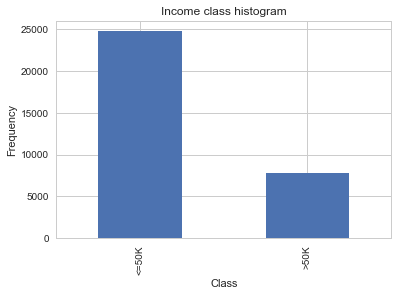

In [9]:
count_classes.plot(kind = 'bar')
plt.title("Income class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

#### There are 24720 out of 32561 data are below 50K-- 75.9% of the data, which means the basic naive training accuracy in this case is 75.9%. 
#### The data is not too unbalanced, so we will choose 'Accuracy' to be the measurement.

#### The next step is to analyse the independent variables.
#### These variables are 'age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week' and 'native.country'.

In [10]:
# Work Class
count_workclasses = pd.value_counts(data['workclass'], sort = True)
count_workclasses

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

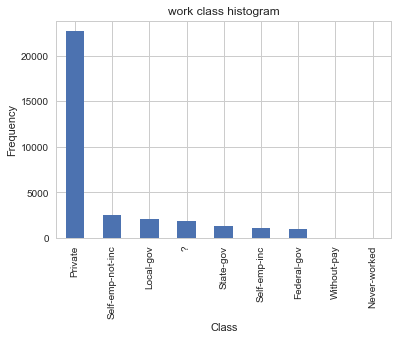

In [11]:
count_workclasses.plot(kind = 'bar')
plt.title("work class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

#### The work class variables is very biased towards 'Private', so the prediction performance should be not too good.
#### Notice there are 1836 rows of '?' value-- We need to decide whether '?' are missing value, or we could treat them as a category.

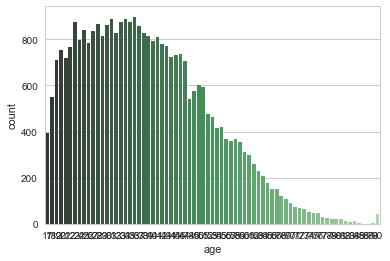

In [13]:
# Age
sns.countplot(x="age", data=data, palette="Greens_d");
# The age distribution is quite continuous, no gaps between ages.

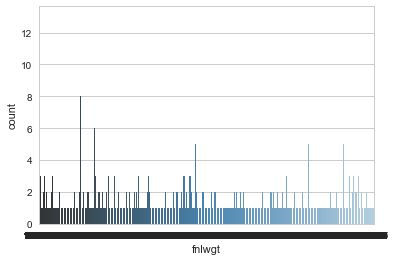

In [14]:
# fnlwgt
sns.countplot(x="fnlwgt", data=data, palette="Blues_d");
# The distribution of fnlwgt is very wild, not too much information gain from this.

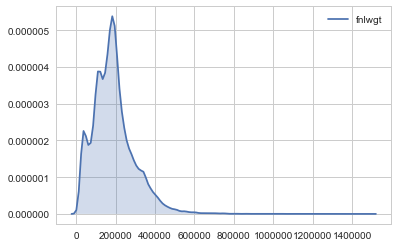

In [66]:
# fnlwgt distribution
sns.kdeplot(data.fnlwgt,shade=True)

In [15]:
#education
count_education = pd.value_counts(data['education'], sort = True)
count_education

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

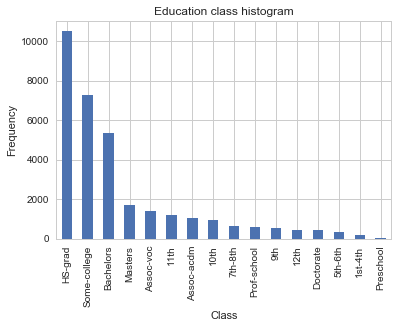

In [16]:
count_education.plot(kind = 'bar')
plt.title("Education class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()
# No '?' Value here
# High School and College are most common, which makes sense in US.


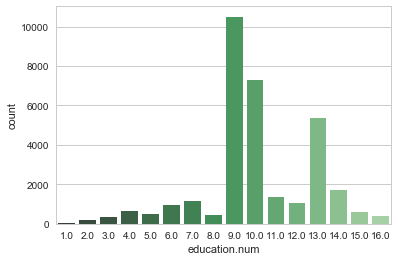

In [17]:
# education years
sns.countplot(x="education.num", data=data, palette="Greens_d");
# The most common are 9 and 10, which is aline with high school and some college educations.

In [18]:
#marital.status
count_marital = pd.value_counts(data['marital.status'], sort = True)
count_marital

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

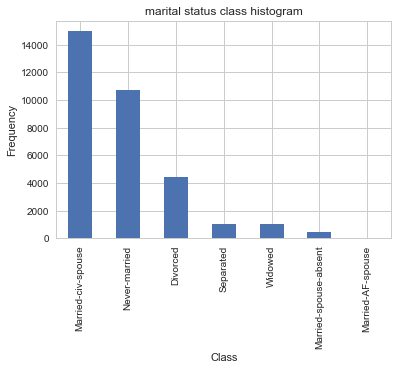

In [19]:
count_marital.plot(kind = 'bar')
plt.title("marital status class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()
# No '?' data.
# Married with spouse and never married are most common.

In [20]:
#occupation
count_occupation= pd.value_counts(data['occupation'], sort = True)
count_occupation

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

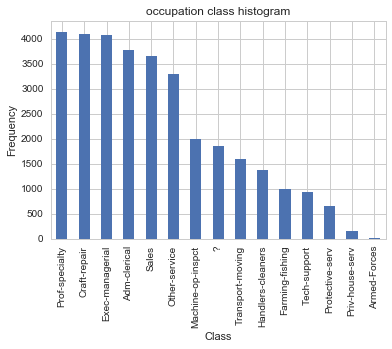

In [21]:
count_occupation.plot(kind = 'bar')
plt.title("occupation class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()
# There are 1843 '?' datapoints. 
# The top 6 occupations are quite evenly distributed in the data.

In [22]:
#relationship
count_relationship = pd.value_counts(data['relationship'], sort = True)
count_relationship

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

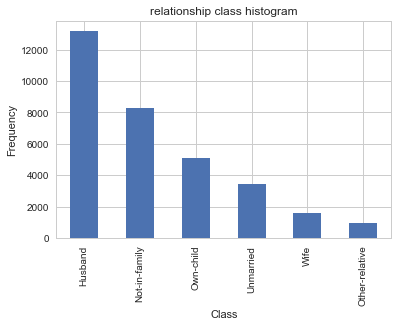

In [23]:
count_relationship.plot(kind = 'bar')
plt.title("relationship class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()
# This data is very strange-- 13193 husbands but only 1568 wifes.
# The survey is unbalanced toward husbands, or maybe in US, many wifes do not go out to work.
# Need to further check with Gender variable.
# No '?' data points.

In [24]:
# Gender
count_sex = pd.value_counts(data['sex'], sort = True)
count_sex

Male      21790
Female    10771
Name: sex, dtype: int64

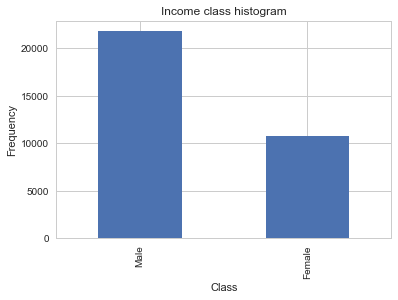

In [25]:
count_sex.plot(kind = 'bar')
plt.title("Income class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()
# As expected there are 2 times of male than female in the data.
# Again, it may due to many US women do not go out to work.
# No '?' data points.

In [26]:
#race
count_race = pd.value_counts(data['race'], sort = True)
count_race

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

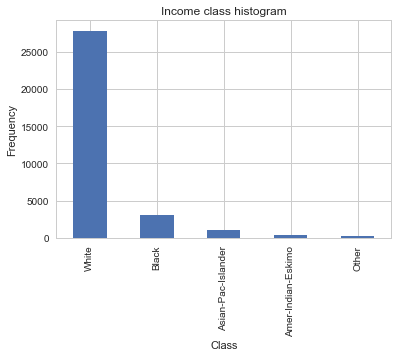

In [27]:
count_race.plot(kind = 'bar')
plt.title("Income class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()
# The large majority of the data is white people.
# No '?' datapoints here


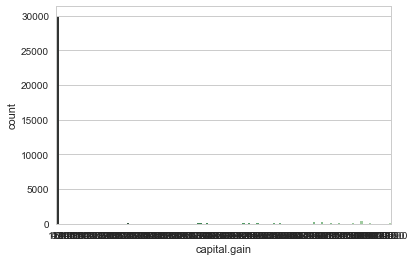

In [28]:
# capital.gain
sns.countplot(x="capital.gain", data=data, palette="Greens_d");

In [29]:
data[data['capital.gain']==0].shape[0]
# There are 29849 (91.7%) of the people have 0 capital gain.

29849

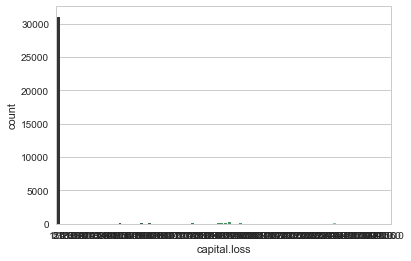

In [30]:
# capital.gain
sns.countplot(x="capital.loss", data=data, palette="Greens_d");

In [31]:
data[data['capital.loss']==0].shape[0]
# There are 31042 (95.3%) of the people have 0 capital gain, which is even larger than capital gain.

31042

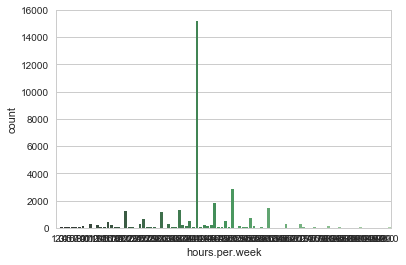

In [32]:
# hours.per.week
sns.countplot(x="hours.per.week", data=data, palette="Greens_d");

In [33]:
pd.value_counts(data['hours.per.week'], sort = True).head()
# About half of the people work 40 hours per week.

40.0    15217
50.0     2819
45.0     1824
60.0     1475
35.0     1297
Name: hours.per.week, dtype: int64

In [34]:
#native.country
count_country = pd.value_counts(data['native.country'], sort = True)
count_country

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

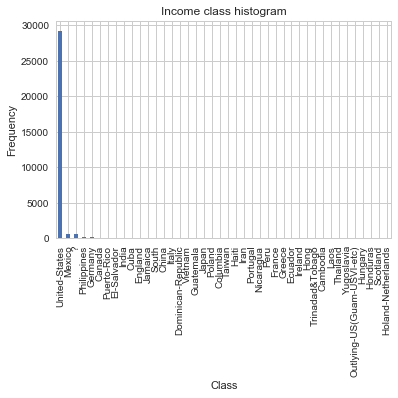

In [35]:
count_country.plot(kind = 'bar')
plt.title("Income class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()
# 90% the data points are americans, which means this feature does not have enough variance to explain the two income classes.
# There are also 581 '?' data points.

### Missing Value
#### After exploring the variables, we notice that there are 3 features contain '?' data points-- workclass, occupation and native country. Respectively, there are 1836, 1843 and 583 '?' rows in these 3 features.
#### We need to check whether '?' values are indeed missing value, or we can treat them as category values.

In [36]:
#Check na missing value in the data -- no na missing values.
data.shape[0] - data.dropna().shape[0]

0

In [37]:
data.ix[(data.workclass=="?") |(data.occupation=="?")| (data['native.country']=="?")].shape[0]

2399

In [38]:
data.ix[(data.workclass=="?") &(data.occupation=="?")].shape[0]

1836

In [42]:
data.ix[(data.workclass=="?")].shape[0]

1836

#### For all people who do not report their work class, they do not report their oppupation as well.

In [43]:
data.ix[(data['native.country']=="?") &(data.occupation=="?")].shape[0]

27

In [44]:
count_workclasses = pd.value_counts(data['workclass'], sort = True)
count_workclasses

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

#### We notice that all people do not report their occupations, they do not report their work class as well. 
#### We also notice that there is no "other work class" option in the work class and there are quite a large potion of people choose to not reveal their occupation or work class -- among 32561 data points, 2399 (7.36%) of them contain '?' data. 
#### So there may be reasons behind refusing report their occuption or work class or native country, so I suggest to keep the '?' as a individual category variable in stead of a missing value since it may have some prediction power.

### Feature selection and engineering
#### We have seen some of the variables are very unbalanced, so we will first explore the correlation between these variables and the label using descriptive analysis.
#### 'age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week' and 'native.country'.

In [45]:
# To between draw the graph to explore, we need to change the labels of indepenedent variables.
data['incomeClass'] = np.where(data.income == '<=50K', 0, 1)

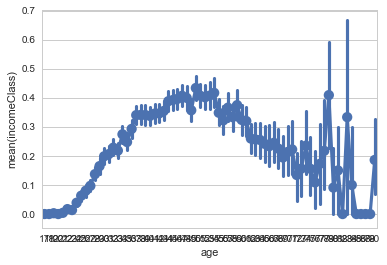

In [46]:
# Age
sns.pointplot(x="age", y="incomeClass", data=data, las=2);
# Normal people reach the higest income at the mid age; 
# while more differences for elderly, it may due to less data points for the 80+ age poeple.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

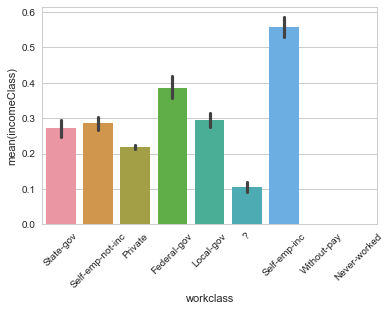

In [47]:
# Workclass
sns.barplot(x="workclass", y="incomeClass", data=data);
plt.xticks(rotation=45)
# Different works have different pay, the self-emp work class obviously have the highest pay, followed by federal works.
# It is obvious the '?' category has clear prediction power! It proves that we should not drop the '?' data points.

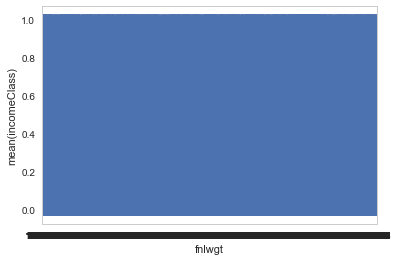

In [48]:
# fnlwgt
sns.pointplot(x="fnlwgt", y="incomeClass", data=data, las=2);
# final weight is evenly distributed-- whether it will have good prediction power is questionable.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

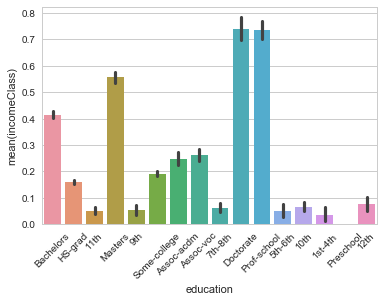

In [49]:
# education
sns.barplot(x="education", y="incomeClass", data=data);
plt.xticks(rotation=45)
# It proves one thing-- higher education level higher pay.
# So do a master or phd. :D

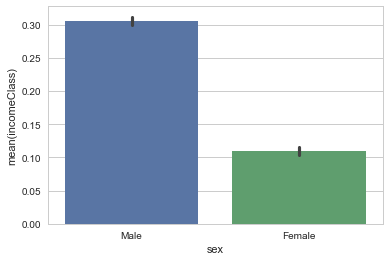

In [50]:
# Gender
sns.barplot(x="sex", y="incomeClass", data=data);
# Male has almost 3 times chances than female to be a high income individual in this data set. 

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

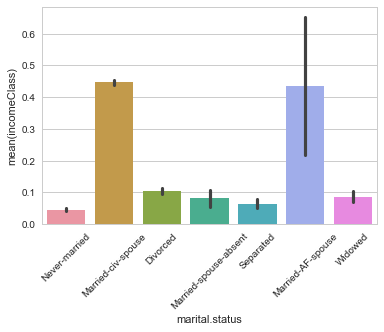

In [51]:
# marital.status
sns.barplot(x="marital.status", y="incomeClass", data=data);
plt.xticks(rotation=45)
# Married with an Armed Forces or Civilian spouse really earns a lot!!! 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

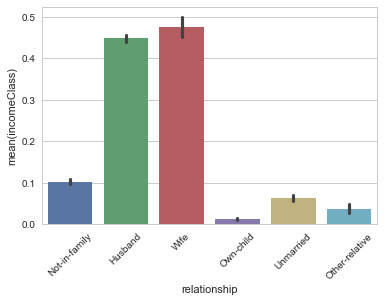

In [52]:
# relationship
sns.barplot(x="relationship", y="incomeClass", data=data);
plt.xticks(rotation=45)
# Averagely wife even has higher chance than husband to become a high income individual!
# It is totally different from the gender income graph where male earns much more than female.
# So let us integrate these 2 to discover more.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

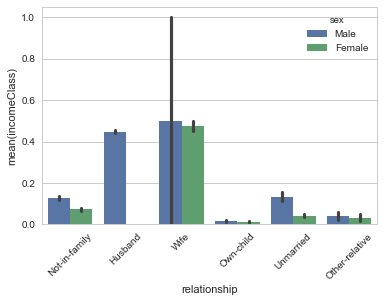

In [53]:
# relationship and gender
sns.barplot(x="relationship", y="incomeClass", hue = "sex",data=data);
plt.xticks(rotation=45)
# Basically we can notice the data itself may has problem with some male to wife at home...

In [54]:
data.ix[(data.relationship=='Wife')& (data.sex == 'Male')].shape[0]

2

In [55]:
#Let us drop these 2 data points and continue
data = data[~((data.relationship=='Wife')& (data.sex == 'Male'))]
data.shape[0]

32559

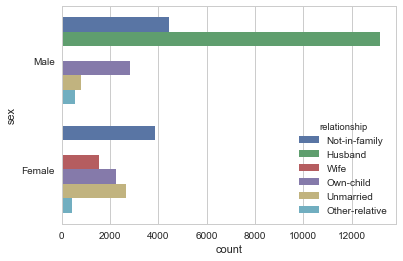

In [57]:
# relationship and gender
sns.countplot(y="sex", hue="relationship", data=data);
# Large percentage of the male in this data are husbands, but only small portion of female in this data are wifes.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

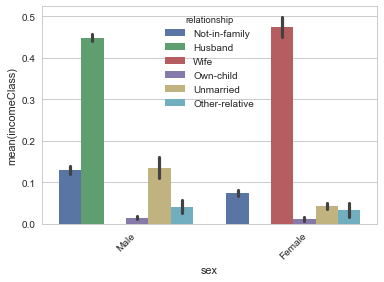

In [56]:
sns.barplot(x="sex", y="incomeClass", hue = "relationship",data=data);
plt.xticks(rotation=45)
# Comparing to wifes, females in the other relationships except "other relative" have more datapoints and earn much less than wifes.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

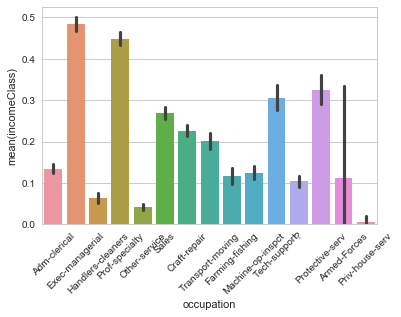

In [58]:
# occupation
sns.barplot(x="occupation", y="incomeClass", data=data);
plt.xticks(rotation=45)
# The top occupation in US to get high income are managers, prof-speciality, protective service and Machine op inspect.
# Btw, machine inspecters earn interestingly high.  

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

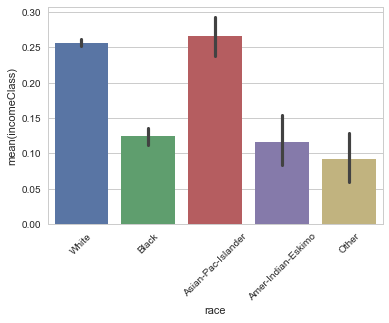

In [59]:
# race
sns.barplot(x="race", y="incomeClass", data=data);
plt.xticks(rotation=45)
# Proudly Asians averagely earn the most, followed by white.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

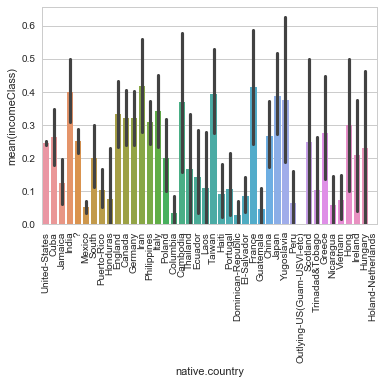

In [61]:
# native.country
sns.barplot(x="native.country", y="incomeClass", data=data);
plt.xticks(rotation=90)
# Averagely seems france people in this dataset earn the most- the native country do have some correlations with income.

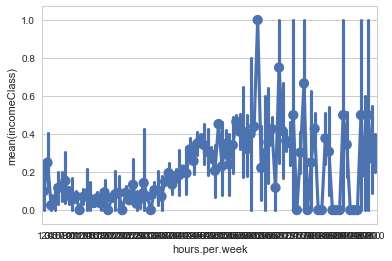

In [62]:
# hours per week
sns.pointplot(x="hours.per.week", y="incomeClass", data=data, las=2);
# Not neccesaryly works longer means higher income

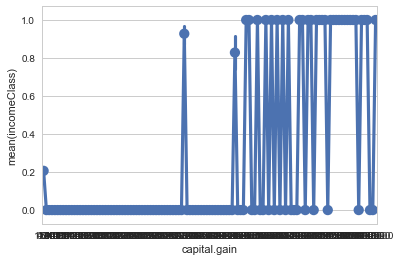

In [64]:
# capital.gain
sns.pointplot(x="capital.gain", y="incomeClass", data=data, las=2);


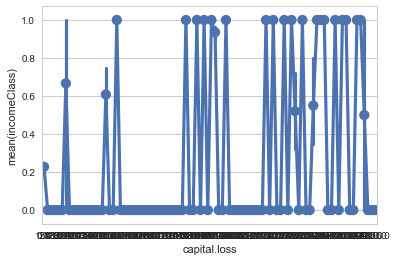

In [65]:
# capital.loss
sns.pointplot(x="capital.loss", y="incomeClass", data=data, las=2);
 

### Feature Selection from model
#### From the correlation plot between dependent variables and the label, we can see that the native country and final weight have relatively little connection with the income.
#### We also use feature selection model from sklearn to do feature selection.

In [ ]:
data.dtypes

#### Because there are so many categorical variables in this data, so we need to create dummies for them.
#### Note that sklearn does not support category type directly.

In [159]:
data1= pd.get_dummies(data, columns=['workclass','education','marital.status','occupation','relationship','race','sex'], prefix=["work", "edu","marital","occup","relation","race","sex"])
data1.shape

(32559, 69)

In [160]:
data1.dtypes

age                          int32
fnlwgt                       int32
education.num              float64
capital.gain               float64
capital.loss               float64
hours.per.week             float64
native.country              object
income                      object
incomeClass                  int32
work_?                       uint8
work_Federal-gov             uint8
work_Local-gov               uint8
work_Never-worked            uint8
work_Private                 uint8
work_Self-emp-inc            uint8
work_Self-emp-not-inc        uint8
work_State-gov               uint8
work_Without-pay             uint8
edu_10th                     uint8
edu_11th                     uint8
edu_12th                     uint8
edu_1st-4th                  uint8
edu_5th-6th                  uint8
edu_7th-8th                  uint8
edu_9th                      uint8
edu_Assoc-acdm               uint8
edu_Assoc-voc                uint8
edu_Bachelors                uint8
edu_Doctorate       

#### The un-used variable and label will be dropped. 
#### Native country has too many categories, 40 dummies will be created; and over 90% of the data points are 'US', so the variance explaination power is very low. Hence we drop this feature.

In [165]:
del data1["income"]
del data1["native.country"]

In [167]:
data1.columns

Index([u'age', u'fnlwgt', u'education.num', u'capital.gain', u'capital.loss',
       u'hours.per.week', u'incomeClass', u'work_?', u'work_Federal-gov',
       u'work_Local-gov', u'work_Never-worked', u'work_Private',
       u'work_Self-emp-inc', u'work_Self-emp-not-inc', u'work_State-gov',
       u'work_Without-pay', u'edu_10th', u'edu_11th', u'edu_12th',
       u'edu_1st-4th', u'edu_5th-6th', u'edu_7th-8th', u'edu_9th',
       u'edu_Assoc-acdm', u'edu_Assoc-voc', u'edu_Bachelors', u'edu_Doctorate',
       u'edu_HS-grad', u'edu_Masters', u'edu_Preschool', u'edu_Prof-school',
       u'edu_Some-college', u'marital_Divorced', u'marital_Married-AF-spouse',
       u'marital_Married-civ-spouse', u'marital_Married-spouse-absent',
       u'marital_Never-married', u'marital_Separated', u'marital_Widowed',
       u'occup_?', u'occup_Adm-clerical', u'occup_Armed-Forces',
       u'occup_Craft-repair', u'occup_Exec-managerial',
       u'occup_Farming-fishing', u'occup_Handlers-cleaners',
       u'o

In [168]:
data1.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,incomeClass,work_?,work_Federal-gov,work_Local-gov,...,relation_Own-child,relation_Unmarried,relation_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,77516,13.0,2174.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13.0,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13.0,0.0,0.0,40.0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


#### Extract x and y from table:

In [250]:
y = data1["incomeClass"]
x = data1.loc[:, data1.columns != 'incomeClass']
x.columns

Index([u'age', u'fnlwgt', u'education.num', u'capital.gain', u'capital.loss',
       u'hours.per.week', u'work_?', u'work_Federal-gov', u'work_Local-gov',
       u'work_Never-worked', u'work_Private', u'work_Self-emp-inc',
       u'work_Self-emp-not-inc', u'work_State-gov', u'work_Without-pay',
       u'edu_10th', u'edu_11th', u'edu_12th', u'edu_1st-4th', u'edu_5th-6th',
       u'edu_7th-8th', u'edu_9th', u'edu_Assoc-acdm', u'edu_Assoc-voc',
       u'edu_Bachelors', u'edu_Doctorate', u'edu_HS-grad', u'edu_Masters',
       u'edu_Preschool', u'edu_Prof-school', u'edu_Some-college',
       u'marital_Divorced', u'marital_Married-AF-spouse',
       u'marital_Married-civ-spouse', u'marital_Married-spouse-absent',
       u'marital_Never-married', u'marital_Separated', u'marital_Widowed',
       u'occup_?', u'occup_Adm-clerical', u'occup_Armed-Forces',
       u'occup_Craft-repair', u'occup_Exec-managerial',
       u'occup_Farming-fishing', u'occup_Handlers-cleaners',
       u'occup_Machine-op-

#### Import the test data here
#### The same process as importing the training data

In [210]:
#The original adult.test file has problems, so we generate csv file to make the input reading solid.
with open("D:\\Documents\\DataSets\\AXAdataset\\dataset\\adult.test") as input_file:
   lines = input_file.readlines()
   newLines = []
   for line in lines:
      newLine = line.strip().split()
      newLines.append( newLine )

with open('D:\\Documents\\DataSets\\AXAdataset\\dataset\\adulttest.csv', 'wb') as test_file:
   file_writer = csv.writer(test_file)
   file_writer.writerows( newLines )
    
test = pd.read_csv("D:\\Documents\\DataSets\\AXAdataset\\dataset\\adulttest.csv", sep=',',skiprows=1, header= None)

cols = ['age','workclass','fnlwgt','education','education.num','marital.status','occupation',
                                  'relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country',
                                  'income']
test.columns = cols
test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,"25,","Private,","226802,","11th,","7,","Never-married,","Machine-op-inspct,","Own-child,","Black,","Male,","0,","0,","40,","United-States,",<=50K.
1,"38,","Private,","89814,","HS-grad,","9,","Married-civ-spouse,","Farming-fishing,","Husband,","White,","Male,","0,","0,","50,","United-States,",<=50K.
2,"28,","Local-gov,","336951,","Assoc-acdm,","12,","Married-civ-spouse,","Protective-serv,","Husband,","White,","Male,","0,","0,","40,","United-States,",>50K.
3,"44,","Private,","160323,","Some-college,","10,","Married-civ-spouse,","Machine-op-inspct,","Husband,","Black,","Male,","7688,","0,","40,","United-States,",>50K.
4,"18,","?,","103497,","Some-college,","10,","Never-married,","?,","Own-child,","White,","Female,","0,","0,","30,","United-States,",<=50K.


In [211]:
test[cols] = test[cols].replace({',': ''}, regex=True)
test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


#### The necessary actions carried on the test data set:

In [267]:
test[['age','fnlwgt']] = test[['age','fnlwgt']].astype(int)

test[['education.num','capital.gain','capital.loss','hours.per.week']] = test[['education.num','capital.gain','capital.loss','hours.per.week']].astype(float)

test['incomeClass'] = np.where(test['income']== "<=50K.", 0 ,1)

test.dtypes

age                 int32
workclass          object
fnlwgt              int32
education          object
education.num     float64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country     object
income             object
incomeClass         int32
dtype: object

In [268]:
test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,incomeClass
0,25,Private,226802,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.,1
3,44,Private,160323,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.,1
4,18,?,103497,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.,0


In [269]:
test1= pd.get_dummies(test, columns=['workclass','education','marital.status','occupation','relationship','race','sex'], prefix=["work", "edu","marital","occup","relation","race","sex"])
test1.shape

(16281, 69)

In [270]:
test1.drop(['income', 'native.country'], axis=1, inplace=True)

In [271]:
test1.columns

Index([u'age', u'fnlwgt', u'education.num', u'capital.gain', u'capital.loss',
       u'hours.per.week', u'incomeClass', u'work_?', u'work_Federal-gov',
       u'work_Local-gov', u'work_Never-worked', u'work_Private',
       u'work_Self-emp-inc', u'work_Self-emp-not-inc', u'work_State-gov',
       u'work_Without-pay', u'edu_10th', u'edu_11th', u'edu_12th',
       u'edu_1st-4th', u'edu_5th-6th', u'edu_7th-8th', u'edu_9th',
       u'edu_Assoc-acdm', u'edu_Assoc-voc', u'edu_Bachelors', u'edu_Doctorate',
       u'edu_HS-grad', u'edu_Masters', u'edu_Preschool', u'edu_Prof-school',
       u'edu_Some-college', u'marital_Divorced', u'marital_Married-AF-spouse',
       u'marital_Married-civ-spouse', u'marital_Married-spouse-absent',
       u'marital_Never-married', u'marital_Separated', u'marital_Widowed',
       u'occup_?', u'occup_Adm-clerical', u'occup_Armed-Forces',
       u'occup_Craft-repair', u'occup_Exec-managerial',
       u'occup_Farming-fishing', u'occup_Handlers-cleaners',
       u'o

#### Extract x and y from test table:

In [272]:
ytest = test1["incomeClass"]
xtest = test1.loc[:, data1.columns != 'incomeClass']
xtest.shape[1]

66

In [273]:
xtest.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,work_?,work_Federal-gov,work_Local-gov,work_Never-worked,...,relation_Own-child,relation_Unmarried,relation_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,25,226802,7.0,0.0,0.0,40.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,89814,9.0,0.0,0.0,50.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,336951,12.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,44,160323,10.0,7688.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,103497,10.0,0.0,0.0,30.0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [274]:
x.shape[1]

66

#### Import sklearn packages:

In [275]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

#### Use linearSVC to do the feature selection part
#### Use Selection from model SKlearn package
#### Comparing the prediction before and after the feature selection.

In [276]:
xfeatures = list(x)

In [277]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(x, y)

In [278]:
model = SelectFromModel(lsvc, prefit=True)
x_new = model.transform(x)
x_new.shape[1]

55L

In [279]:
zip(list(model.get_support()), xfeatures)

[(True, 'age'),
 (False, 'fnlwgt'),
 (True, 'education.num'),
 (True, 'capital.gain'),
 (True, 'capital.loss'),
 (True, 'hours.per.week'),
 (True, 'work_?'),
 (True, 'work_Federal-gov'),
 (True, 'work_Local-gov'),
 (False, 'work_Never-worked'),
 (False, 'work_Private'),
 (True, 'work_Self-emp-inc'),
 (True, 'work_Self-emp-not-inc'),
 (True, 'work_State-gov'),
 (False, 'work_Without-pay'),
 (True, 'edu_10th'),
 (True, 'edu_11th'),
 (True, 'edu_12th'),
 (False, 'edu_1st-4th'),
 (False, 'edu_5th-6th'),
 (True, 'edu_7th-8th'),
 (True, 'edu_9th'),
 (True, 'edu_Assoc-acdm'),
 (True, 'edu_Assoc-voc'),
 (True, 'edu_Bachelors'),
 (True, 'edu_Doctorate'),
 (True, 'edu_HS-grad'),
 (True, 'edu_Masters'),
 (False, 'edu_Preschool'),
 (True, 'edu_Prof-school'),
 (True, 'edu_Some-college'),
 (True, 'marital_Divorced'),
 (False, 'marital_Married-AF-spouse'),
 (True, 'marital_Married-civ-spouse'),
 (True, 'marital_Married-spouse-absent'),
 (True, 'marital_Never-married'),
 (True, 'marital_Separated'),
 

#### We notice that only fnlwgt is not selected in this model, while the other categorical features have at least one value is significant in here.
#### So we check the prediction performance before and after dropping fnlwgt feature.

In [280]:
from sklearn.metrics import classification_report
#Training metrics
print(classification_report(y,lsvc.predict(x)))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91     24719
          1       0.75      0.58      0.65      7840

avg / total       0.84      0.85      0.84     32559



In [281]:
#Test metrics
print(classification_report(ytest,lsvc.predict(xtest)))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91     12435
          1       0.74      0.58      0.65      3846

avg / total       0.85      0.85      0.85     16281



In [ ]:
from sklearn import metrics

In [286]:
#train Accuracy
metrics.accuracy_score(y, lsvc.predict(x))

0.85159249362695411

In [282]:
#Test Accuracy
metrics.accuracy_score(ytest, lsvc.predict(xtest))

0.85363306922179227

#### Prediction after dropping fnlwgt:

In [283]:
lsvc1 = LinearSVC(C=0.1, penalty="l1", dual=False).fit(x.loc[:,x.columns!='fnlwgt'], y)

In [284]:
print(classification_report(ytest,lsvc1.predict(xtest.loc[:,xtest.columns!='fnlwgt'])))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91     12435
          1       0.74      0.58      0.65      3846

avg / total       0.85      0.85      0.85     16281



In [288]:
#Train Accuracy
metrics.accuracy_score(y, lsvc1.predict(x.loc[:,x.columns!='fnlwgt']))

0.85153106667895206

In [285]:
#Test Accuracy
metrics.accuracy_score(ytest, lsvc1.predict(xtest.loc[:,xtest.columns!='fnlwgt']))

0.85258890731527548

#### The difference is minimum and by dropping the fnlwgt feature, the test accuracy increased a bit, so we decide to drop fnlwgt.

In [289]:
x = x.loc[:,x.columns!='fnlwgt']
xtest = xtest.loc[:,xtest.columns!='fnlwgt']

In [290]:
x.shape

(32559, 65)

In [291]:
xtest.shape

(16281, 65)

## Modelling
#### We will use logistic regression, random forest, neural network and SVM to do the modelling.

### Logistic Regression
#### We define a function to tune and print the C parameters.

In [298]:
def printing_Kfold_scores(x,y):

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Accuracy score'])
    results_table['C_parameter'] = c_param_range
    
    
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')
        
        # Call the logistic regression model with a certain C parameter
        lr = LogisticRegression(C = c_param, penalty = 'l1')

        scores = cross_val_score(lr, x, y, cv=5)
        scores
        accu = scores.mean()
        
        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean accuracy score'] = accu
        j += 1
        print('')
        print('Mean accuracy score ', accu)
        print('')

    best_c = results_table.loc[results_table['Mean accuracy score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [299]:
best_c = printing_Kfold_scores(x,y)

-------------------------------------------
('C parameter: ', 0.01)
-------------------------------------------


('Mean accuracy score ', 0.84603338066707745)

-------------------------------------------
('C parameter: ', 0.1)
-------------------------------------------


('Mean accuracy score ', 0.85036398900820642)

-------------------------------------------
('C parameter: ', 1)
-------------------------------------------


('Mean accuracy score ', 0.85060969868795089)

-------------------------------------------
('C parameter: ', 10)
-------------------------------------------


('Mean accuracy score ', 0.85048685799914492)

-------------------------------------------
('C parameter: ', 100)
-------------------------------------------


('Mean accuracy score ', 0.85051757052985744)

*********************************************************************************
('Best model to choose from cross validation is with C parameter = ', 1.0)
*********************************************

In [300]:
lr = LogisticRegression(C = 1, penalty = 'l1').fit(x,y)

In [302]:
#Test Accuracy
metrics.accuracy_score(ytest, lr.predict(xtest))

0.85252748602665684

In [303]:
#Test metrics
print(classification_report(ytest,lr.predict(xtest)))

             precision    recall  f1-score   support

          0       0.88      0.93      0.91     12435
          1       0.73      0.60      0.66      3846

avg / total       0.85      0.85      0.85     16281



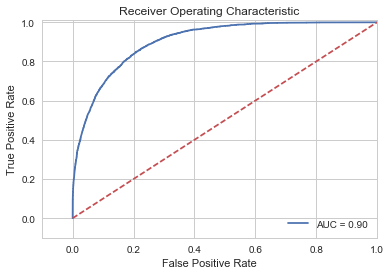

In [305]:
y_pred_score = lr.decision_function(xtest.values)

fpr, tpr, thresholds = roc_curve(ytest.values.ravel(),y_pred_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### The logistic regression already achieve pretty good result: test accuracy 85.25% and AUC 0.90.

### TREE


In [316]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(x, y)

In [313]:
#Train CV Accuracy
scores = cross_val_score(clf_tree, x, y, cv=5)
accu = scores.mean()
accu

0.81888266388727149

In [311]:
#Test Accuracy
metrics.accuracy_score(ytest, clf_tree.predict(xtest))

0.81972851790430568

In [314]:
#Test metrics
print(classification_report(ytest,clf_tree.predict(xtest)))

             precision    recall  f1-score   support

          0       0.88      0.89      0.88     12435
          1       0.62      0.61      0.61      3846

avg / total       0.82      0.82      0.82     16281



In [330]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

y_score = clf_tree.predict(xtest)

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(ytest[:], y_score[:])
roc_auc = auc(fpr, tpr)

#ROC curve for a specific class here for the class 2
roc_auc

0.74750797752054843

In [337]:
!pip install graphviz

#### A possible way to print tree plot (need to install graphviz):

import graphviz
dot_data = tree.export_graphviz(clf_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Tree") 

dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                         feature_names=list(x.columns[0]),  
                         class_names=list(y.columns[0]),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### logistic regression has higher accuracy and AUC.

### Random Forrest

In [349]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [362]:
rfimp = pd.DataFrame(zip(list(rf.feature_importances_), x.columns))

In [365]:
rfimp.columns = ['importance','name']
rfimp.sort_values(by='importance',ascending= False).head(10)

,importance,name
0,0.242824,age
4,0.118150,hours.per.week
2,0.109762,capital.gain
32,0.056167,marital_Married-civ-spouse
1,0.051398,education.num
52,0.041995,relation_Husband
34,0.040466,marital_Never-married
3,0.035539,capital.loss
47,0.024500,occup_Prof-specialty
41,0.020322,occup_Exec-managerial


In [366]:
#Train CV Accuracy
scores = cross_val_score(rf, x, y, cv=5)
accu = scores.mean()
accu

0.8419179062686204

In [367]:
#Test Accuracy
metrics.accuracy_score(ytest, rf.predict(xtest))

0.83944475155088749

In [368]:
#Test metrics
print(classification_report(ytest,rf.predict(xtest)))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90     12435
          1       0.69      0.59      0.63      3846

avg / total       0.83      0.84      0.83     16281



In [370]:
# Tuning the rfm models
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{
        "n_estimators":[8,15,20],
        "max_depth":[5,10,None],
        "class_weight":["balanced",None]
    }]

rfm = GridSearchCV(RandomForestClassifier(n_jobs=-1), tuned_parameters, cv=5)
rfm.fit(x, y)
print("Best parameters :")
print(rfm.best_params_)

Best parameters :
{'n_estimators': 15, 'max_depth': 10, 'class_weight': None}


In [372]:
#Test metrics
print(classification_report(ytest,rfm.predict(xtest)))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91     12435
          1       0.80      0.54      0.65      3846

avg / total       0.85      0.86      0.85     16281



In [373]:
#Test Accuracy
metrics.accuracy_score(ytest, rfm.predict(xtest))

0.85909956390885078

In [384]:
y_pred_score = rfm.predict(xtest)

fpr, tpr, thresholds = roc_curve(ytest,y_pred_score)
roc_auc = auc(fpr,tpr)
roc_auc

0.74971919504041906

#### Random Forest has higher accuracy than the previous models. It is also the last model here which is able to see the importance of the features. The more complex models below will not be able to show the feature importances.

### SVM

In [441]:
from sklearn import svm

clf_svm = svm.SVC(probability= True)
clf_svm.fit(x, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [387]:
#Train CV Accuracy
scores = cross_val_score(clf_svm, x, y, cv=5)
accu = scores.mean()
accu

0.86221945511225184

In [388]:
#Test Accuracy
metrics.accuracy_score(ytest, clf_svm.predict(xtest))

0.86585590565690074

In [406]:
y_pred_score = clf_svm.predict(xtest)

fpr, tpr, thresholds = roc_curve(ytest,y_pred_score)
roc_auc = auc(fpr,tpr)
roc_auc

0.76662385433897451

#### Tuning SVC model 
#### It runs for too long, but if we have time, we can always tune it. 
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{
        "C":[0.1,5,10]
    }]

svm_tune = GridSearchCV(svm.SVC(n_jobs=-1), tuned_parameters, cv=5)
svm_tune.fit(x, y)
print("Best parameters :")
print(rfm.best_params_)

### Neural Network

In [390]:
from sklearn.neural_network import MLPClassifier

nn1 = MLPClassifier()

In [391]:
#Train CV Accuracy
scores = cross_val_score(nn1, x, y, cv=5)
accu = scores.mean()
accu

0.83715716683578756

In [393]:
#Test Accuracy
nn1.fit(x,y)
metrics.accuracy_score(ytest, nn1.predict(xtest))

0.84165591794115846

In [401]:
# Tuning the rfm models
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{
        "hidden_layer_sizes":[(100,),(150,),(50,50),(100,100),(100,100,100),(100,50,50),(100,100,100,50)]
    }]

nn_tune = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
nn_tune.fit(x, y)
print("Best parameters :")
print(nn_tune.best_params_)

Best parameters :
{'hidden_layer_sizes': (100,)}


In [403]:
# Tuning the nn models
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{
        "hidden_layer_sizes":[(100,),(50,),(50,50),(100,50),],
        'tol': [1e-3, 1e-4, 1e-5],
        'epsilon': [1e-7, 1e-8, 1e-9]
    }]

nn_tune = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
nn_tune.fit(x, y)
print("Best parameters :")
print(nn_tune.best_params_)

Best parameters :
{'epsilon': 1e-09, 'tol': 1e-05, 'hidden_layer_sizes': (100,)}


In [404]:
#Train Accuracy
metrics.accuracy_score(y, nn_tune.predict(x))

0.8487668540188581

In [405]:
#Test Accuracy
metrics.accuracy_score(ytest, nn_tune.predict(xtest))

0.84441987592899703

In [407]:
y_pred_score = nn_tune.predict(xtest)

fpr, tpr, thresholds = roc_curve(ytest,y_pred_score)
roc_auc = auc(fpr,tpr)
roc_auc

0.79353791039458232

### Ensemble Method - Adboost

In [408]:
from sklearn.ensemble import AdaBoostClassifier

ada1 = AdaBoostClassifier(n_estimators=100)

In [409]:
#Train CV Accuracy
scores = cross_val_score(ada1, x, y)
scores.mean()

0.8645538279251207

In [410]:
#Test Accuracy
ada1.fit(x,y)
metrics.accuracy_score(ytest, ada1.predict(xtest))

0.86518027148209564

In [ ]:
# Tuning the adaboost models
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{
        "n_estimators":[50,100,150],
        'learning_rate': [0.1, 1, 10]
    }]

ada_tune = GridSearchCV(AdaBoostClassifier(), tuned_parameters, cv=5)
ada_tune.fit(x, y)

In [412]:
print("Best parameters :")
print(ada_tune.best_params_)

Best parameters :
{'n_estimators': 150, 'learning_rate': 1}


In [413]:
#Train Accuracy
metrics.accuracy_score(y, ada_tune.predict(x))

0.86691851715347523

In [414]:
#Test Accuracy
y_pred_score = ada_tune.predict(xtest)
metrics.accuracy_score(ytest, y_pred_score)

0.8668386462747989

In [415]:
fpr, tpr, thresholds = roc_curve(ytest,y_pred_score)
roc_auc = auc(fpr,tpr)
roc_auc

0.78486723787407464

### Ensemble Method - Gradient Tree Boosting

In [416]:
from sklearn.ensemble import GradientBoostingClassifier

gbm1 = GradientBoostingClassifier()

In [417]:
#Train CV Accuracy
scores = cross_val_score(gbm1, x, y)
scores.mean()

0.86578233859033116

In [418]:
#Test Accuracy
gbm1.fit(x,y)
metrics.accuracy_score(ytest, gbm1.predict(xtest))

0.87009397457158655

In [419]:
# Tuning the adaboost models
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{
        "n_estimators":[50,100,150],
        'learning_rate': [0.01,0.1, 1, 10]
    }]

gbm_tune = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=5)
gbm_tune.fit(x, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [420]:
print("Best parameters :")
print(gbm_tune.best_params_)

Best parameters :
{'n_estimators': 50, 'learning_rate': 1}


In [421]:
#Train Accuracy
metrics.accuracy_score(y, gbm_tune.predict(x))

0.87653183451580208

In [424]:
#Test Accuracy
y_pred_score = gbm_tune.predict(xtest)
metrics.accuracy_score(ytest, y_pred_score)

0.87040108101467972

In [425]:
fpr, tpr, thresholds = roc_curve(ytest,y_pred_score)
roc_auc = auc(fpr,tpr)
roc_auc

0.79599938400431069

### Final Model: 
### Ensemble Method - Voting Method

#### So far the best methods are:
#### Gradient Tree Boosting -- Test accuracy 0.8704
#### AdaBoosting -- Test accuracy 0.8668
#### Random Forest -- Test accuracy 0.8591
#### So we use these 3 models to vote the final prediction:

In [444]:
from itertools import product
from sklearn.ensemble import VotingClassifier

# Training classifiers

eclf = VotingClassifier(estimators=[('gbm', gbm_tune), ('ada', ada_tune), ('rf',rfm)], voting='soft')

eclf = eclf.fit(x,y)

In [446]:
#Train Accuracy
metrics.accuracy_score(y, eclf.predict(x))

0.87683896925581251

In [447]:
#Test Accuracy
y_pred_score = eclf.predict(xtest)
metrics.accuracy_score(ytest, y_pred_score)

0.87218229838462014

In [448]:
fpr, tpr, thresholds = roc_curve(ytest,y_pred_score)
roc_auc = auc(fpr,tpr)
roc_auc

0.78603072952833675

#### The final voting model outperforms the other models with 87.22% test accuracy.

## Conclusion
#### For income class prediction, we performed 
#### 1. Feature exploration by checking independent and dependent variables
#### 2. Possible missing value exploration and determine to keep '?' value and drop some datapoints with wrong info
#### 3. Feature selection by exploring correlation between dependent variables and the label and also using select from model package and linearSVC model.
#### 4. Build models using Logistic, Tree, Random forest, Support vector machine, Neural Net, AdaBoost, Gradient tree boosting and ensemble voting method.
#### 5. Tunned each of the models to obtain best train accuracy and test accuracy.
#### 6. Comparing the results between all models and finally choose the Voting method model combining Random forest, AdaBoost and Gradien tree boosting with 87.22% test accuracy.


